# 23 Sklearn Feature Selection

In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns # maybe
from scipy import stats # maybe

In [3]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [4]:
np.random.seed(0)

* avoid overfit
* reduce training time
* interpretability

### Curse of dimensionality

In [5]:
n = 100
vmin = 0
vmax = 10
x1 =  np.random.uniform(vmin, vmax, n)
x2 =  np.random.uniform(vmin, vmax, n)
x3 =  np.random.uniform(vmin, vmax, n)

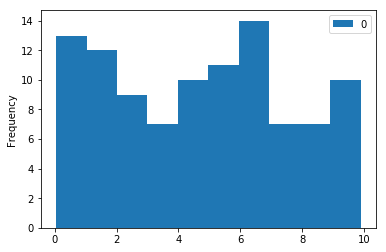

In [6]:
# One Dimension
pd.DataFrame(x1).plot(kind="hist")

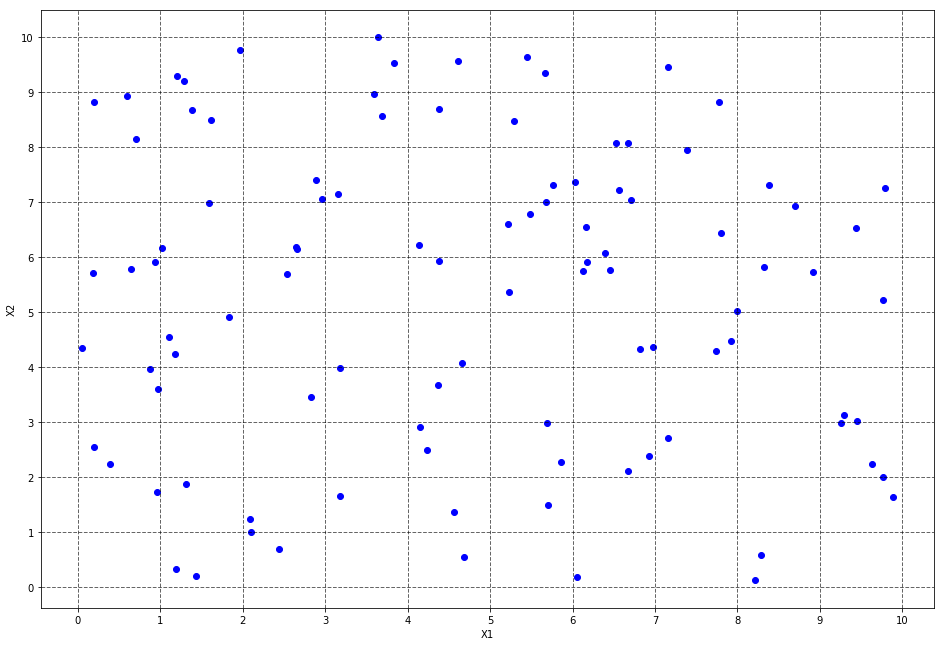

In [7]:
# Two Dimensions

fig = plt.figure(figsize=(16, 11))
ax = fig.add_subplot(111)

ax.scatter(x1, x2, c="b", marker="o")

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_xticks(np.arange(0, 11, 1) )
ax.set_yticks(np.arange(0, 11, 1) )
ax.grid(color='k', linestyle='--', linewidth=1, alpha=0.6)

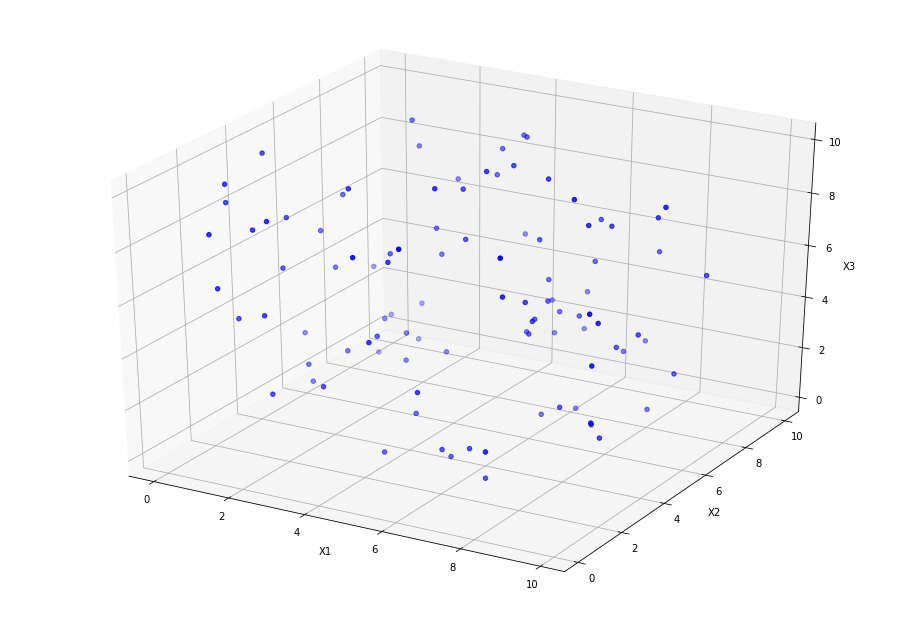

In [8]:
# Drei Dimensionen
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 11))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, x3, c="b", marker="o")
ax.grid(color='k', linestyle='-', linewidth=1, alpha=0.6)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.show()

### Generating data

In [9]:
n_samples = 20
X = np.random.uniform(-2, 2, n_samples)
y = X**3 + np.random.uniform(0, 2, n_samples)

(20,) (20,)


Text(0,0.5,'y')

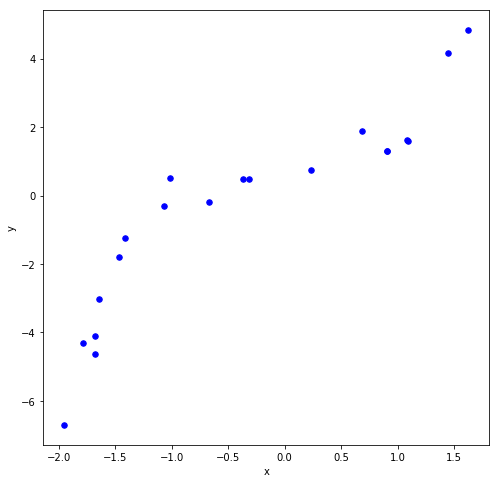

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))

print(X.shape, y.shape)
plt.scatter(X, y, color='b', s=30, marker='o')

plt.xlabel('x')
plt.ylabel('y')

> Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

Two features: Banner, Site. Categorial. Could manually add a mix of both. Categorical like the old ones.

### Excursion: Feature Interaction

Generating new feature from existing ones in a dataframe. Concatenation.

In [11]:
features = {
    'a': ['sun', 'moon', 'moon', 'stars'],
    'b': ['white', 'blue', 'green', 'white'],
}

In [12]:
['{}|{}'.format(a, b) for a, b in zip(features["a"], features["b"])]

['sun|white', 'moon|blue', 'moon|green', 'stars|white']

In [13]:
df = pd.DataFrame(features)

In [14]:
df

,a,b
0,sun,white
1,moon,blue
2,moon,green
3,stars,white


In [15]:
df["i1"] = df["a"].map(str) + "|" + df["b"]

In [16]:
df

,a,b,i1
0,sun,white,sun|white
1,moon,blue,moon|blue
2,moon,green,moon|green
3,stars,white,stars|white


In [17]:
pd.get_dummies(df["i1"])

,moon|blue,moon|green,stars|white,sun|white
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0


In [18]:
df["a"]

0      sun
1     moon
2     moon
3    stars
Name: a, dtype: object

In [19]:
pd.get_dummies(df["a"])

,moon,stars,sun
0,0,0,1
1,1,0,0
2,1,0,0
3,0,1,0


In [20]:
pd.get_dummies(df["b"])

,blue,green,white
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1


Real-valued features can be added by multiplication.

In [21]:
df = pd.DataFrame(np.random.randn(4, 2))

In [22]:
df

,0,1
0,-1.188859,-0.506816
1,-0.596314,-0.052567
2,-1.936280,0.188779
3,0.523891,0.088422


In [23]:
df["new"] = df[0] * df[1]

In [24]:
df

,0,1,new
0,-1.188859,-0.506816,0.602533
1,-0.596314,-0.052567,0.031347
2,-1.936280,0.188779,-0.365528
3,0.523891,0.088422,0.046324


Any function will work. Might improve performance.

> Feature interaction presents a challenge to feature
selection for classification. A feature by itself may
have little correlation with the target concept, but
when it is combined with some other features, they
can be strongly correlated with the target concept.

> Optimal feature selection requires an exponentially large search space O(2^N).

### PolynomialFeatures

Text(0,0.5,'y')

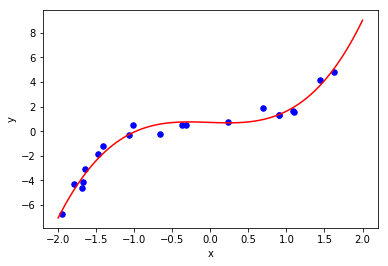

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures

fig, ax = plt.subplots()
plt.scatter(X, y, color='b', s=30, marker='o')

x_plot = np.linspace(-2, 2, 100)
poly_model = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())

poly_model.fit(X[:, np.newaxis], y)
y_plot = poly_model.predict(x_plot[:, np.newaxis])

plt.plot(x_plot, y_plot, color="red")

plt.xlabel('x')
plt.ylabel('y')

Using fewer polynomial iteractions.

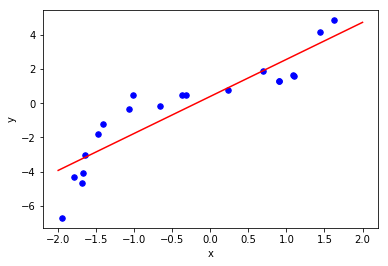

In [26]:
fig, ax = plt.subplots()
plt.scatter(X, y, color='b', s=30, marker='o')

poly_model = make_pipeline(PolynomialFeatures(1),
                           LinearRegression())

poly_model.fit(X[:, np.newaxis], y)
y_plot = poly_model.predict(x_plot[:, np.newaxis])
plt.plot(x_plot, y_plot, color="red")

plt.xlabel('x')
plt.ylabel('y')

plt.show()

Text(0,0.5,'y')

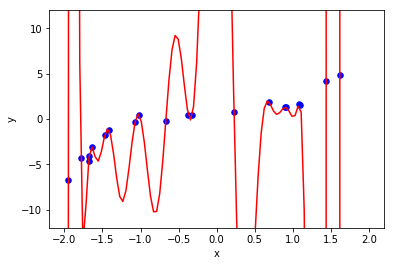

In [27]:
fig, ax = plt.subplots()
plt.scatter(X, y, color='b', s=30, marker='o')

poly_model = make_pipeline(PolynomialFeatures(20), LinearRegression())
poly_model.fit(X[:, np.newaxis], y)
y_plot = poly_model.predict(x_plot[:, np.newaxis])
plt.plot(x_plot, y_plot, color="red")

plt.ylim(-12, 12)

plt.xlabel('x')
plt.ylabel('y')

Using more data.

In [28]:
n_samples = 200
X = np.random.uniform(-2, 2, n_samples)
y = X**3 + np.random.uniform(0, 2, n_samples)

(200,) (200,)


Text(0,0.5,'y')

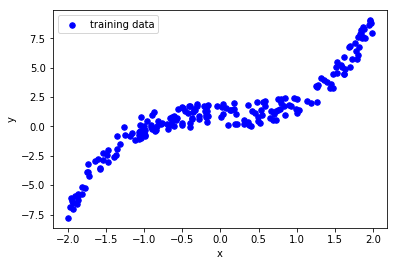

In [29]:
print(X.shape, y.shape)
plt.scatter(X, y, color='b', s=30, marker='o', label="training data")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

Text(0,0.5,'y')

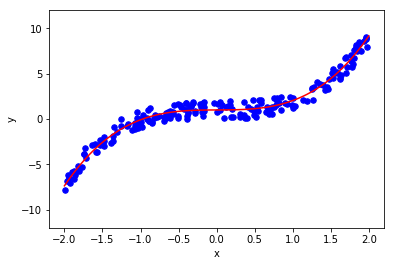

In [30]:
fig, ax = plt.subplots()
plt.scatter(X, y, color='b', s=30, marker='o', label="training points")

poly_model = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())

poly_model.fit(X[:, np.newaxis], y)
y_plot = poly_model.predict(x_plot[:, np.newaxis])

plt.plot(x_plot, y_plot, color="red")
plt.ylim(-12, 12)

plt.xlabel('x')
plt.ylabel('y')

Text(0,0.5,'y')

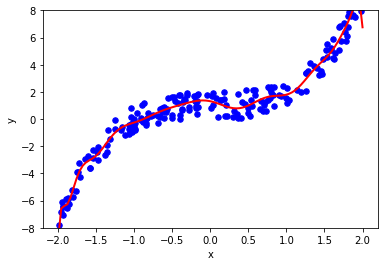

In [31]:
fig, ax = plt.subplots()
plt.scatter(X, y, color='b', s=30, marker='o', label="training points")

poly_model = make_pipeline(PolynomialFeatures(20),
                           LinearRegression())

poly_model.fit(X[:, np.newaxis], y)
y_plot = poly_model.predict(x_plot[:, np.newaxis])
plt.plot(x_plot, y_plot, lw=2, color="red")
plt.ylim(-8, 8)

plt.xlabel('x')
plt.ylabel('y')

Text(0,0.5,'y')

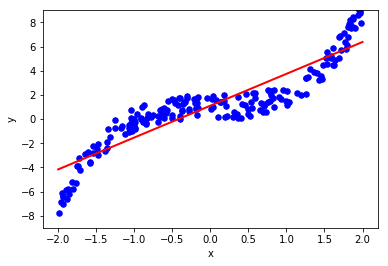

In [32]:
fig, ax = plt.subplots()
plt.scatter(X, y, color='b', s=30, marker='o', label="training points")

poly_model = make_pipeline(PolynomialFeatures(1),
                           LinearRegression())

poly_model.fit(X[:, np.newaxis], y)
y_plot = poly_model.predict(x_plot[:, np.newaxis])

plt.plot(x_plot, y_plot, lw=2, color="red")
plt.ylim(-9, 9)

plt.xlabel('x')
plt.ylabel('y')

As a general rule:
    
* more data, fewer features and lower model complexity helps to reduce overfit

## Choice of features

* what is a good feature?
* how many?
* optimal combination? (hard to find, O(2^N))

### Univariate feauture exploration

In [33]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()

X = iris.data
y = iris.target

svc = SVC(kernel='linear', C=1E0)
print(X.shape, y.shape)

n_classes = 3
colors = 'byr'
CMAP = colors
plot_step = 0.01

rns = np.random.RandomState(12)

noise2 = rns.uniform(0, 6, size=(len(X), 1))

X_noise = np.hstack([X, noise2])

print(X_noise.shape)

(150, 4) (150,)
(150, 5)


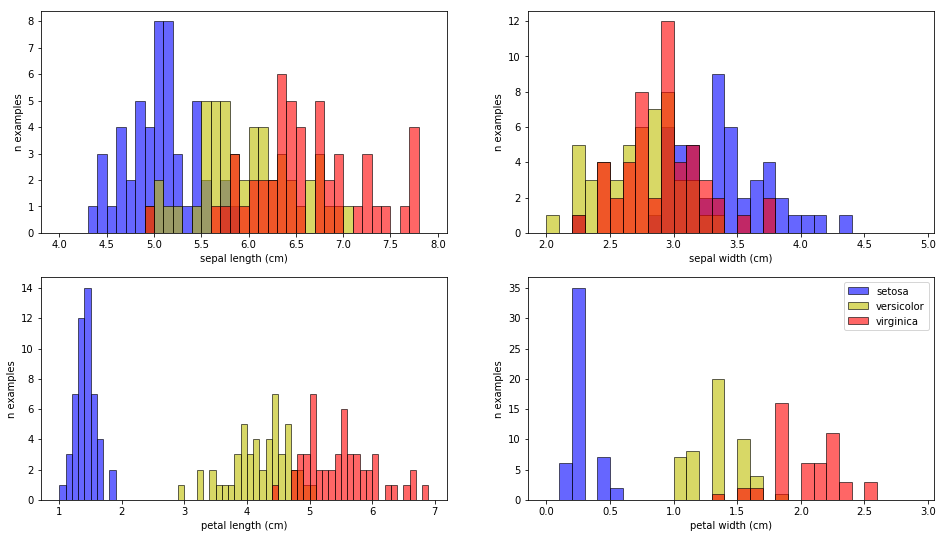

In [34]:
Y_feature_names = iris.feature_names
Y_target_names = iris.target_names

Y_feature_names = np.append(Y_feature_names, 'noise2')
Y_target_names = np.append(Y_target_names, 'noise2')

fig = plt.figure(1, figsize=(16, 9))

BINS = []
BINS.append(np.arange(4, 8, 0.1))
BINS.append(np.arange(2, 5, 0.1))
BINS.append(np.arange(1, 7, 0.1))
BINS.append(np.arange(0, 3, 0.1))
BINS.append(np.arange(0, 6, 0.1))

for fid in range(4):
    X = X_noise[:, fid]
    y = iris.target

    plt.subplot(2, 2, fid + 1)

    plt.xlabel(Y_feature_names[fid])
    plt.ylabel('n examples')
    plt.axis("tight")

    for i, color in zip(range(n_classes), colors):
        idx = np.where(y == i)
        plt.hist(X[idx], alpha=0.6, color=color, edgecolor='black',
                 lw=1, label=Y_target_names[i],
                 bins=BINS[fid])
        if fid == 3:
            plt.legend(loc='upper right')

    plt.axis("tight")

In [35]:
# Pandas version

0.7466666666666667
0.7466666666666667
0.7466666666666667
0.5466666666666666
0.5466666666666666
0.5466666666666666
0.9533333333333334
0.9533333333333334
0.9533333333333334
0.96
0.96
0.96


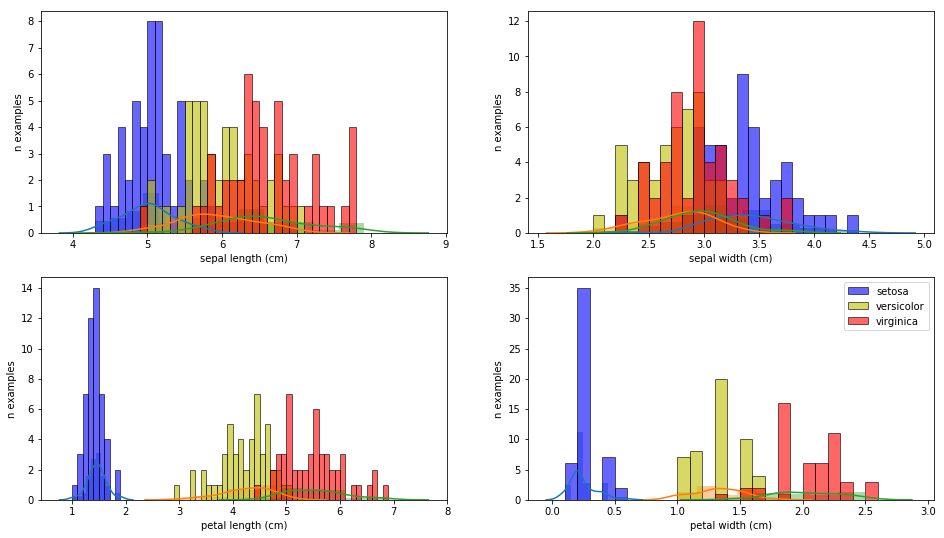

In [36]:
iris = load_iris()

X = iris.data
y = iris.target

noise2 = np.random.uniform(0, 6, size=(len(X), 1))

Y_feature_names = iris.feature_names
Y_target_names = iris.target_names

Y_feature_names = np.append(Y_feature_names, 'noise2')

Y_target_names = np.append(Y_target_names, 'noise2')

fig = plt.figure(1, figsize=(16, 9))


for fid in range(4):
    X = X_noise[:, fid]
    y = iris.target

    plt.subplot(2, 2, fid + 1)

    plt.xlabel(Y_feature_names[fid])
    plt.ylabel('n examples')
    plt.axis("tight")

    for i, color in zip(range(n_classes), colors):
        idx = np.where(y == i)
        clf = svc.fit(X.reshape([150, 1]), y)
        print(clf.score(X.reshape([150, 1]), y))
        sns.distplot(X[idx], kde=True, rug=False) # Plot datapoints in an array as sticks on an axis.
        plt.hist(X[idx], alpha=0.6, color=color, edgecolor='black', lw=1, label=Y_target_names[i], bins=BINS[fid])
        if fid == 3:
            plt.legend(loc='upper right')

    plt.axis("tight")

### Detour: What happens in KDE?

* data smoothing (with parameter bendwidth)
* place a normal kernel on each data point
* kernels are summed to make the kernel density estimate

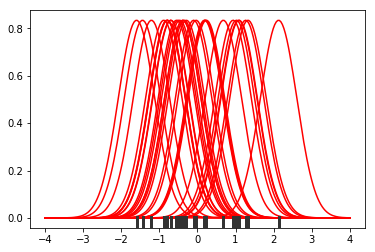

In [37]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

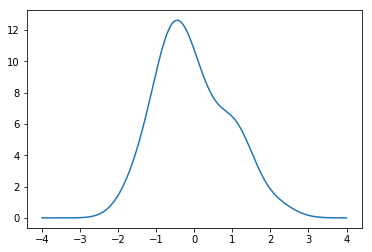

In [38]:
from scipy.integrate import trapz

density = np.sum(kernels, axis=0)
plt.plot(support, density);

## Variance and Covariance

Strong correlation of between two features might hint at similar information in the features.

$$
r = \frac{cov(X, Y)}{std(X) std(Y)}
$$

* r = 1 100% correlation
* r = -1 100% antikorreliert
* r = 0 no linear Korrelation

> 0.3 to 0.5 will hint at "correlation", only linear relationsships.

In [39]:
pd.DataFrame(iris.data).corr()

,0,1,2,3
0,1.000000,-0.109369,0.871754,0.817954
1,-0.109369,1.000000,-0.420516,-0.356544
2,0.871754,-0.420516,1.000000,0.962757
3,0.817954,-0.356544,0.962757,1.000000


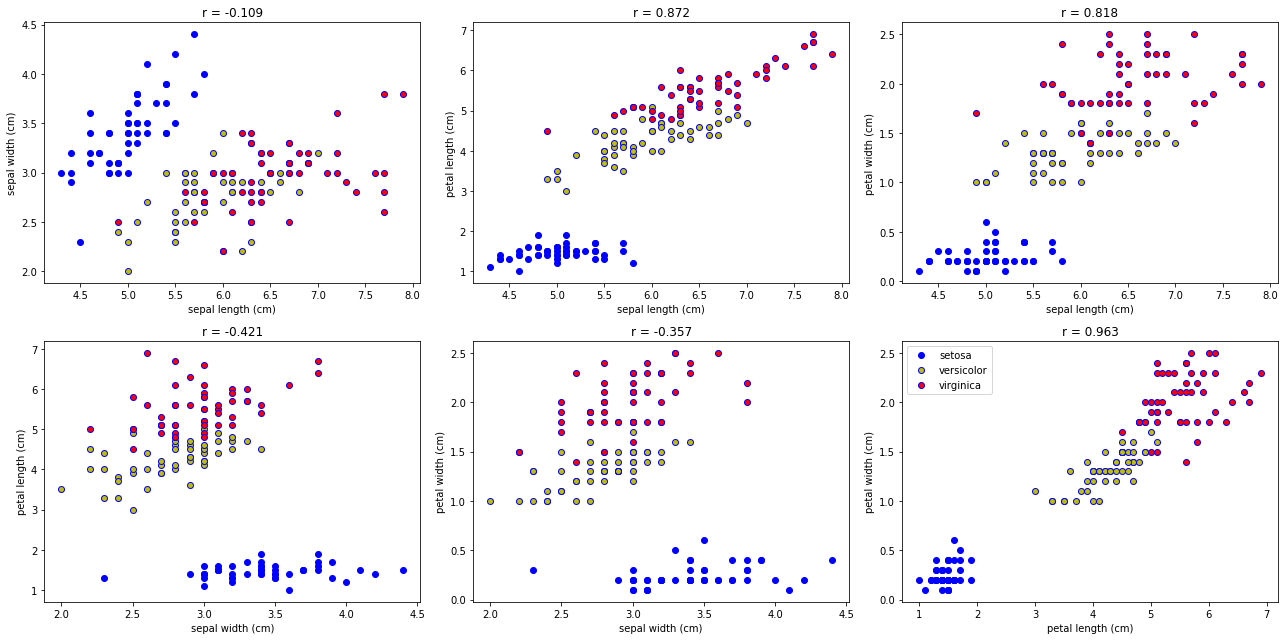

In [40]:
from scipy.stats import pearsonr

Y_feature_names = iris.feature_names

n_classes = 3
colors = 'byr'
CMAP = colors
plot_step = 0.01

fig = plt.figure(1, figsize=(18, 9))

pos = [[6.2, 4.2], [4.5, 6.5], [7, 0.5], [3.5, 3], [3.5, 1], [5, 0.5]]

for i, pair in enumerate([[0, 1], [0, 2], [0, 3],
                          [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    plt.subplot(2, 3, i + 1)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    plt.axis("tight")

    for j, color in zip(range(n_classes), colors):
        idx = np.where(y == j)
        plt.scatter(X[idx, 0],
                    X[idx, 1],
                    c=color, edgecolor='b', label=iris.target_names[j], cmap=CMAP)

    r = "r = " + str(round(pearsonr(X[:, 0], X[:, 1])[0], 3))
    plt.title(r)
    plt.axis("tight") # https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axis.html#matplotlib.axes.Axes.axis
    plt.axis("tight")
    plt.tight_layout()

plt.legend(loc='upper left')

### Correlation between feature and target

In [41]:
from sklearn.datasets import load_iris
import numpy as np
from scipy.stats import pearsonr # pearson function from scipy

iris = load_iris() # reload data

X = iris.data
y = iris.target

for fid in (0, 1, 2, 3): # loop over all features
    idx = np.where( (y == 0) | (y == 1) )

    x = X[idx]
    x = x[:, fid]

    print(iris.feature_names[fid], pearsonr(x, y[idx])[0])

sepal length (cm) 0.7282901487462141
sepal width (cm) -0.6840194061591771
petal length (cm) 0.969955270124919
petal width (cm) 0.9601575454105536


Pearson correlation coefficient is for linear relationships. A disadvantage.

In [42]:
x = np.random.uniform(-1, 1, 1000)
print(pearsonr(x, x**2)[0])

0.04697065897496768


### PCA

* Unsupervised technique.
* Find axis with most variance, other axes orthogonal.
* can be used as visualization helper

In [43]:
import numpy as np
import matplotlib.pyplot as plt

size = 200
X = np.zeros((size, 2))
x1 = np.random.uniform(0, 2, size=size)
x2 = -1.1*x1+1.8 + rns.normal(0, 0.2, size=size)
X[:, 0] = x1
X[:, 1] = x2

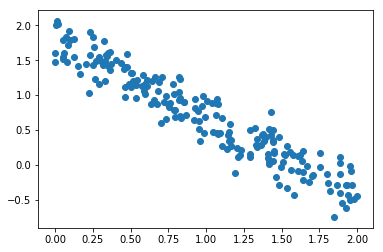

In [44]:
plt.scatter(X[:, 0], X[:, 1])

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)
X_reduced = pca.fit_transform(X)

print(pca.explained_variance_)
print(pca.components_)
print(pca.mean_)


[0.74598848 0.01811315]
[[ 0.64716529 -0.76234971]
 [ 0.76234971  0.64716529]]
[0.97274023 0.70441731]


Text(0,0.5,'x2')

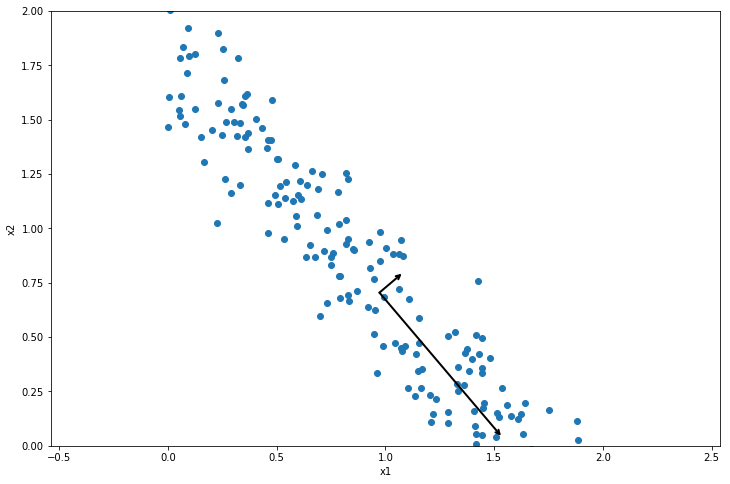

In [46]:
fig = plt.figure(figsize=(12, 8))

plt.scatter(X[:, 0], X[:, 1])

arrowprops = dict(arrowstyle='->',
                 linewidth=2,
                 shrinkA=0,
                 shrinkB=0)

# explained_variance_ => The amount of variance explained by each of the selected components.

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length)
    ax = plt.gca()
    # mean_, Per-feature empirical mean, estimated from the training set.
    ax.annotate('', pca.mean_ + v, pca.mean_, arrowprops=arrowprops)

plt.axis('equal')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.xlabel('x1')
plt.ylabel('x2')

Text(0,0.5,'pca component 2')

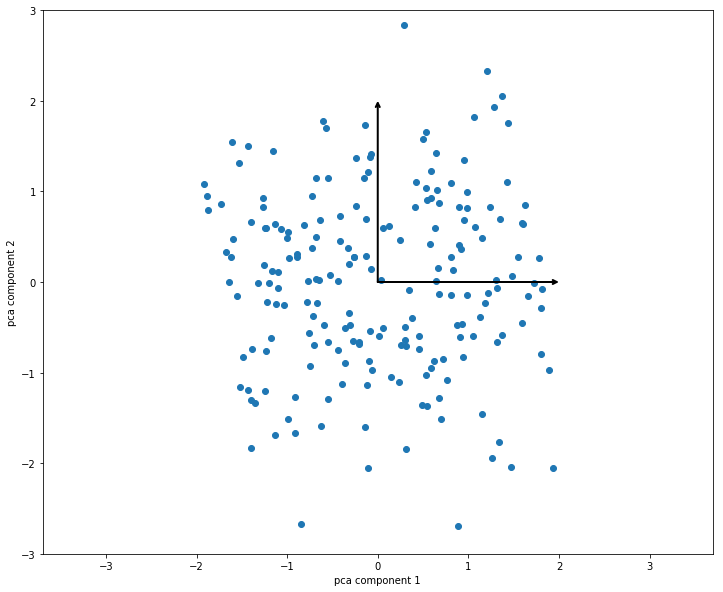

In [47]:
fig = plt.figure(figsize=(12, 10))

X_pca = pca.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1])

plt.annotate('', [0, 2], [0, 0], arrowprops=arrowprops)
plt.annotate('', [2, 0], [0, 0], arrowprops=arrowprops)

plt.axis('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('pca component 1')
plt.ylabel('pca component 2')

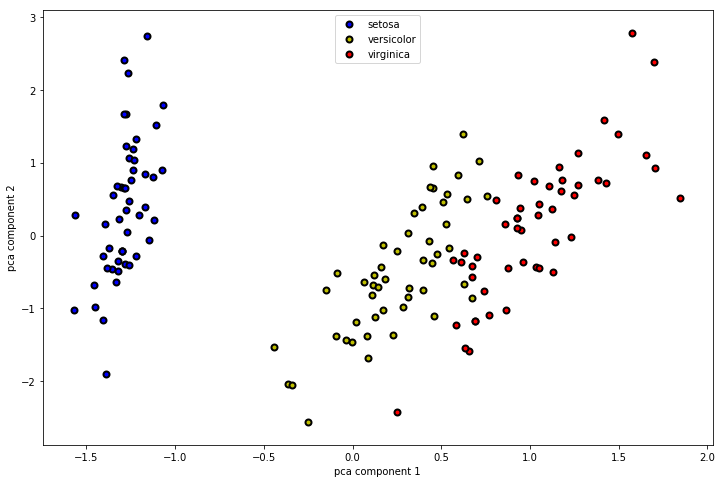

In [48]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

n_classes = 3
colors = 'byr'
CMAP = colors

iris = load_iris()

X = iris.data
y = iris.target

Y_target_names = iris.target_names

pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig = plt.figure(figsize=(12, 8))

X_pca = pca.transform(X)

for i, color in zip(range(n_classes), colors):
    idx = np.where(y == i)
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label = Y_target_names[i],  c=color,
                edgecolor='black', lw=2, cmap=CMAP)

plt.axis("tight")
plt.xlabel('pca component 1')
plt.ylabel('pca component 2')
plt.legend(loc='upper center')

### Feature selection

* F-Score = variance between classes / variance within class

* high F-Score can be an indicator of a good feature

In [49]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

# reference score
svc = SVC(kernel='linear', C=1)
clf = svc.fit(X, y)
print(clf.score(X, y))

0.9933333333333333


In [50]:
# Add random noise as non informative data
rns = np.random.RandomState(12)
noise = rns.uniform(0, 6, size=(len(X), 1))
X = np.hstack([X, noise])


# Score with all noise
clf = svc.fit(X, y)
clf.score(X, y)

0.9933333333333333

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=4)
X_sel = selector.fit_transform(X, y)

In [52]:
# Selector scores

In [53]:
print(selector.scores_)

[1.19264502e+02 4.73644614e+01 1.17903433e+03 9.59324406e+02
 9.48960689e-01]


In [54]:
svc = SVC(kernel='linear', C=1)
clf = svc.fit(X_sel, y)
print(clf.score(X_sel, y))

0.9933333333333333


### Selection with tree models

In [55]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X, y)
print(clf.feature_importances_)

[0.14844582 0.02185809 0.51646318 0.30025252 0.01298039]


In [56]:
svc = SVC(kernel='linear')
clf = svc.fit(X_sel, y)
print(clf.score(X_sel, y))

0.9933333333333333


### Recursive feature elimination

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=12)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [58]:
from sklearn.feature_selection import RFE
selector = RFE(clf, 4)

In [59]:
selector = selector.fit(X, y)

In [60]:
print(selector.get_support())

[ True  True  True  True False]
